# **Week 6 - Convolutional Neural Networks**

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib . pyplot as plt

In [ ]:
try :
  # % tensorflow_version only exists in Colab .
  % tensorflow_version 2. x
except Exception :
  pass

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2. x`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
import tensorflow as tf
tf . test . gpu_device_name ()

'/device:GPU:0'

In [ ]:
from tensorflow . python . client import device_lib
device_lib . list_local_devices ()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13732900103468400066
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12412330966669289443
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

Exe. 1 Load the CIFAR-10 dataset from Keras

In [ ]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.cifar10.load_data()

In [ ]:
print(train_data.shape,train_labels.shape,test_data.shape,test_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


<function matplotlib.pyplot.tight_layout>

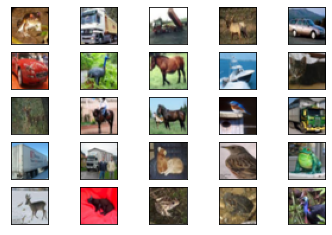

In [ ]:
for i in range(25):
  plt . subplot (5,5,i+1)
  plt . xticks ([])
  plt . yticks ([])
  plt . imshow (train_data[i])
plt.tight_layout

Exe. 2 Convert train and test X values to float32 and normalize data between range 0.0 and 1.0. (Since that the pixel values fall in the range of 0 to 255,
normalise train and test sets.)


In [ ]:
train_data=train_data.astype('float32')
test_data=test_data.astype('float32')
train_data=train_data/255.
test_data=test_data/255.

Exe. 3 Define a network model (NET I) with the following architecture:
CONV − POOL − CONV − POOL − CONV − POOL − FC − FC

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D ( filters=32 , kernel_size =3 , padding ='same', activation ='relu' , input_shape = (32,32,3))) 
model.add(keras . layers . MaxPooling2D ( pool_size =(2,2), strides =2, padding ='valid'))
model.add(keras.layers.Conv2D ( filters=64 , kernel_size =3 , padding ='same', activation ='relu'))
model.add(keras . layers . MaxPooling2D ( pool_size =(2,2), strides =2, padding ='valid'))
model.add(keras.layers.Conv2D ( filters=64 , kernel_size =3 , padding ='same', activation ='relu'))
model.add(keras . layers . MaxPooling2D ( pool_size =(2,2), strides =2, padding ='valid'))

model.add( keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

Exe. 4 Compute the Pn and On of your network and verify your calculation by printing
model.summary().

In [ ]:
#Pn = output_channel_number * (input_channel_number * kernel_height * kernel_width + 1)

# Pn1 = 32*(3*3*3+1) = 896
# Pn2 = 64*(32*3*3+1) = 18496
# Pn3 = 64*(64*3*3+1) = 36928

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

Exe. 5 Compile the model with an adam optimizer and a sparse categorical
crossentropy loss function

In [ ]:
model . compile ( loss ='sparse_categorical_crossentropy',
                 optimizer = 'adam',
                 metrics =['accuracy'])

Exe. 6 Train the model with 20% of validation data with 128 batches and 20
epochs. Save the fitting result in a variable called history.

In [ ]:
history=model.fit(train_data,train_labels,batch_size=128,epochs=20,validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 9s 19ms/step - loss: 1.5658 - accuracy: 0.4342 - val_loss: 1.2857 - val_accuracy: 0.5388
Epoch 2/20
313/313 [==============================] - 4s 14ms/step - loss: 1.1669 - accuracy: 0.5837 - val_loss: 1.0980 - val_accuracy: 0.6131
Epoch 3/20
313/313 [==============================] - 4s 14ms/step - loss: 0.9938 - accuracy: 0.6501 - val_loss: 0.9616 - val_accuracy: 0.6647
Epoch 4/20
313/313 [==============================] - 5s 15ms/step - loss: 0.8738 - accuracy: 0.6926 - val_loss: 0.9163 - val_accuracy: 0.6800
Epoch 5/20
313/313 [==============================] - 5s 15ms/step - loss: 0.7771 - accuracy: 0.7253 - val_loss: 0.8237 - val_accuracy: 0.7117
Epoch 6/20
313/313 [==============================] - 4s 14ms/step - loss: 0.6918 - accuracy: 0.7572 - val_loss: 0.8685 - val_accuracy: 0.7043
Epoch 7/20
313/313 [==============================] - 5s 15ms/step - loss: 0.6138 - accuracy: 0.7835 - val_loss: 0.8700 - val_accuracy: 0.7051

Exe. 7 After fitting the model, evaluate it on the test set using model.evaluate().
Print accuracy and loss of the evaluated model on the test set.


In [ ]:
score=model.evaluate(test_data,test_labels)
print('accuracy : ',round(score[1],2),' loss : ',round(score[0],2))

313/313 [==============================] - 2s 5ms/step - loss: 1.6419 - accuracy: 0.7259
accuracy :  0.73  loss :  1.64


Exe. 8 As a test, predict the test dataset using model.predict(), and check
if the predicted image label is the same as the real label for the first image of
the test set. Notice that, in classification problems, the predicted output is a
vector with a size of total number of classes where each element represents a
probability of each class.


In [ ]:
predictions=model.predict(test_data)
print(predictions[0])
print("predicted : ",np.argmax(predictions[0])," actual : ",test_labels[0])

[2.9161909e-10 1.1028068e-10 2.4022112e-08 5.1838458e-03 4.2508437e-09
 9.9481541e-01 3.9586456e-07 3.9963397e-12 2.9879001e-07 1.5251148e-10]
predicted :  5  actual :  [3]


Exe. 9 Using the history saved in Exe. 6, demonstrate the ’accuracy’
(train accuracy changing), versus ’val accuracy’ (validation accuracy changing) changing regarding epochs evolutions in a graph. To better understanding
of the history print(history.history.keys()). What are your observations?
How is the deviation between two curves?

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
print(history.history['accuracy'])
print(history.history['val_accuracy'])

[0.43415001034736633, 0.5837249755859375, 0.6500999927520752, 0.6926000118255615, 0.7252749800682068, 0.7571750283241272, 0.7834500074386597, 0.8096250295639038, 0.8347749710083008, 0.855525016784668, 0.8852249979972839, 0.9075000286102295, 0.9236249923706055, 0.9394749999046326, 0.9530249834060669, 0.9630249738693237, 0.9678000211715698, 0.9713249802589417, 0.9775500297546387, 0.9800000190734863]
[0.5388000011444092, 0.613099992275238, 0.6646999716758728, 0.6800000071525574, 0.7117000222206116, 0.7042999863624573, 0.7050999999046326, 0.7226999998092651, 0.7354999780654907, 0.7483000159263611, 0.7404999732971191, 0.7307000160217285, 0.7389000058174133, 0.7325999736785889, 0.7281000018119812, 0.7305999994277954, 0.727400004863739, 0.732200026512146, 0.7261999845504761, 0.7328000068664551]


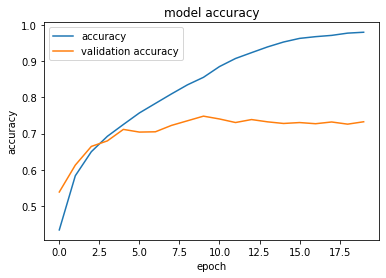

In [ ]:
plt.plot(history.history['accuracy'],label="accuracy")
plt.plot(history.history['val_accuracy'],label="validation accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

#the accuracy of the train set goes way higher than the validation accuracy

Exe. 10 Similar to the previous Exe., demonstrate the training loss (’loss’)
versus the validation loss (’val loss’) w.r.t the epochs evolutions. What are
your observations? After how many epochs, the overfitting happens?

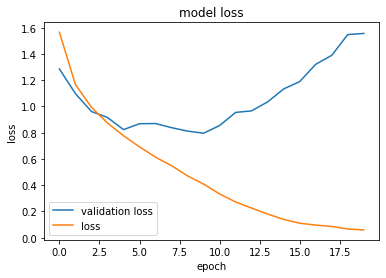

In [ ]:
plt.plot(history.history['val_loss'],label="validation loss")
plt.plot(history.history['loss'],label="loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# at approximately 6 epochs, the model starts to overfit (when the blue line is at it's lowest, it's the best fit, after that, it is overfitting)

Exe. 11 Define a new model (NET II) with higher filter/kernel size (filter size:
5 * 5) as below:
CNV − CONV − POOL − CONV − POOL − FC − FC

In [ ]:
model2 = keras.Sequential()

model2.add(keras.layers.Conv2D ( filters=32 , kernel_size =5 , padding ='same', activation ='relu' , input_shape = (32,32,3))) 
model2.add(keras.layers.Conv2D ( filters=64 , kernel_size =5 , padding ='same', activation ='relu'))
model2.add(keras . layers . MaxPooling2D ( pool_size =(2,2), strides =2, padding ='valid'))
model2.add(keras.layers.Conv2D ( filters=64 , kernel_size =5 , padding ='same', activation ='relu'))
model2.add(keras . layers . MaxPooling2D ( pool_size =(2,2), strides =2, padding ='valid'))

model2.add( keras.layers.Flatten())

model2.add(keras.layers.Dense(512,activation='relu'))
model2.add(keras.layers.Dense(10,activation='softmax'))

Exe. 12 Print the summary of this model, check the number of parameters
using the formula given in Exe. 4

In [ ]:
#Pn = output_channel_number * (input_channel_number * kernel_height * kernel_width + 1)

# Pn1 = 32*(3*5*5+1) = 2432
# Pn2 = 64*(32*5*5+1) = 51264
# Pn3 = 64*(64*5*5+1) = 102464

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        102464    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4096)             

Exe. 13 Compile the model with the same parameters of Exe. 5

In [ ]:
model2 . compile ( loss ='sparse_categorical_crossentropy',
                 optimizer = 'adam',
                 metrics =['accuracy'])

Exe. 14 Fit the model same as Exe. 6. Do not forget to save it as history in
the same time

In [ ]:
history2=model2.fit(train_data,train_labels,batch_size=128,epochs=20,validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 15s 43ms/step - loss: 1.5723 - accuracy: 0.4337 - val_loss: 1.2549 - val_accuracy: 0.5552
Epoch 2/20
313/313 [==============================] - 13s 42ms/step - loss: 1.0880 - accuracy: 0.6163 - val_loss: 1.0066 - val_accuracy: 0.6437
Epoch 3/20
313/313 [==============================] - 13s 41ms/step - loss: 0.8647 - accuracy: 0.6961 - val_loss: 0.8616 - val_accuracy: 0.6968
Epoch 4/20
313/313 [==============================] - 13s 41ms/step - loss: 0.6970 - accuracy: 0.7569 - val_loss: 0.8288 - val_accuracy: 0.7182
Epoch 5/20
313/313 [==============================] - 13s 41ms/step - loss: 0.5377 - accuracy: 0.8123 - val_loss: 0.8503 - val_accuracy: 0.7215
Epoch 6/20
313/313 [==============================] - 13s 42ms/step - loss: 0.3943 - accuracy: 0.8622 - val_loss: 0.9310 - val_accuracy: 0.7188
Epoch 7/20
313/313 [==============================] - 13s 42ms/step - loss: 0.2633 - accuracy: 0.9117 - val_loss: 1.0252 - val_accuracy:

Exe. 16 Similar to Exes 9 and 10, demonstrate how the loss and accuracy
change for the training and validation according to epochs? What are your observations? how is the overfitting now? after how many epochs happens? How
is the deviation between training and validation in comparison to NET I model ?

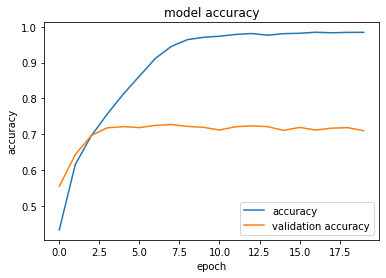

In [ ]:
plt.plot(history2.history['accuracy'],label="accuracy")
plt.plot(history2.history['val_accuracy'],label="validation accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

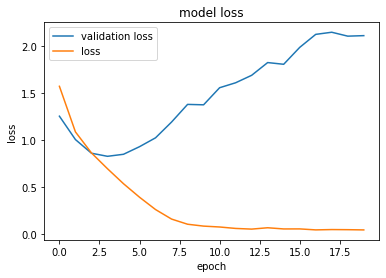

In [ ]:
plt.plot(history2.history['val_loss'],label="validation loss")
plt.plot(history2.history['loss'],label="loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Comment

Exe. 17 Define a deeper model (NET III) as an improvement of NET I and
NET II: 

CONV − CONV − POOL − CONV − POOL − CONV − CONV − CONV − POOL − FC − FC − FC

In [ ]:
model3 = keras.Sequential()

model3.add(keras.layers.Conv2D ( filters=96 , kernel_size =3 , padding ='same', activation ='relu' , input_shape = (32,32,3))) 
model3.add(keras.layers.Conv2D ( filters=96 , kernel_size =3 , padding ='same', activation ='relu'))
model3.add(keras . layers . MaxPooling2D ( pool_size =(2,2), strides =2, padding ='valid'))
model3.add(keras.layers.Dropout(0.50))
model3.add(keras.layers.Conv2D ( filters=128 , kernel_size =3 , padding ='same', activation ='relu'))
model3.add(keras . layers . MaxPooling2D ( pool_size =(2,2), strides =2, padding ='valid'))
model3.add(keras.layers.Dropout(0.50))
model3.add(keras.layers.Conv2D ( filters=128 , kernel_size =3 , padding ='same', activation ='relu'))
model3.add(keras.layers.Conv2D ( filters=128 , kernel_size =3 , padding ='same', activation ='relu'))
model3.add(keras.layers.Conv2D ( filters=128 , kernel_size =3 , padding ='same', activation ='relu'))
model3.add(keras . layers . MaxPooling2D ( pool_size =(2,2), strides =2, padding ='valid'))
model3.add(keras.layers.Dropout(0.50))

model3.add( keras.layers.Flatten())

model3.add(keras.layers.Dense(1024,activation='relu',kernel_regularizer=keras.regularizers.l2(0.0005)))
model3.add(keras.layers.Dropout(0.50))
model3.add(keras.layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l2(0.0005)))
model3.add(keras.layers.Dropout(0.50))
model3.add(keras.layers.Dense(10,activation='softmax'))

Exe. 18 Do the same things as Exes. 12 to 16 for this model too. How are
the results? Do you have overfitting in this model too? how is the deviation
between training and evaluation accuracy?


In [ ]:
#Pn = output_channel_number * (input_channel_number * kernel_height * kernel_width + 1)

# Pn1 = 32*(3*5*5+1) = 2432
# Pn2 = 64*(32*5*5+1) = 51264
# Pn3 = 64*(64*5*5+1) = 102464

model3.summary()

In [ ]:
model3 . compile ( loss ='sparse_categorical_crossentropy',
                 optimizer = 'adam',
                 metrics =['accuracy'])

In [ ]:
history3=model3.fit(train_data,train_labels,batch_size=128,epochs=20,validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 24s 69ms/step - loss: 2.1488 - accuracy: 0.2908 - val_loss: 1.6985 - val_accuracy: 0.4238
Epoch 2/20
313/313 [==============================] - 21s 67ms/step - loss: 1.6317 - accuracy: 0.4409 - val_loss: 1.5128 - val_accuracy: 0.5044
Epoch 3/20
313/313 [==============================] - 22s 70ms/step - loss: 1.4659 - accuracy: 0.5164 - val_loss: 1.3967 - val_accuracy: 0.5438
Epoch 4/20
313/313 [==============================] - 21s 66ms/step - loss: 1.3510 - accuracy: 0.5673 - val_loss: 1.1942 - val_accuracy: 0.6321
Epoch 5/20
313/313 [==============================] - 21s 66ms/step - loss: 1.2722 - accuracy: 0.6025 - val_loss: 1.1102 - val_accuracy: 0.6643
Epoch 6/20
313/313 [==============================] - 21s 66ms/step - loss: 1.2001 - accuracy: 0.6308 - val_loss: 1.0736 - val_accuracy: 0.6758
Epoch 7/20
313/313 [==============================] - 21s 66ms/step - loss: 1.1564 - accuracy: 0.6506 - val_loss: 1.0030 - val_accuracy:

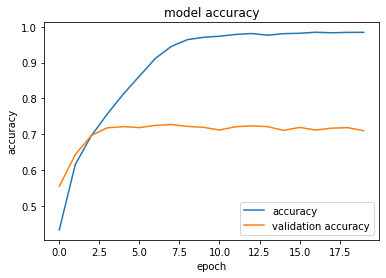

In [ ]:
plt.plot(history3.history['accuracy'],label="accuracy")
plt.plot(history3.history['val_accuracy'],label="validation accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

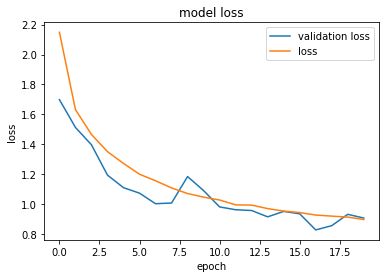

In [ ]:
plt.plot(history3.history['val_loss'],label="validation loss")
plt.plot(history3.history['loss'],label="loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Comment